# Covid-19 Mexico Data

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Link para descargar bases de datos: https://web.archive.org/web/20220122063317/http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/historicos/08/datos_abiertos_covid19_30.08.2020.zip

In [129]:
data = pd.read_csv('/Users/ro/Downloads/200801COVID19MEXICO.csv', encoding='latin1')
data.info()

/var/folders/4x/6c9p63ls07x580slpnw2nx2h0000gn/T/ipykernel_96076/126345027.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/ro/Downloads/200801COVID19MEXICO.csv', encoding='latin1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999697 entries, 0 to 999696
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  999697 non-null  object
 1   ID_REGISTRO          999697 non-null  object
 2   ORIGEN               999697 non-null  int64 
 3   SECTOR               999697 non-null  int64 
 4   ENTIDAD_UM           999697 non-null  int64 
 5   SEXO                 999697 non-null  int64 
 6   ENTIDAD_NAC          999697 non-null  int64 
 7   ENTIDAD_RES          999697 non-null  int64 
 8   MUNICIPIO_RES        999697 non-null  int64 
 9   TIPO_PACIENTE        999697 non-null  int64 
 10  FECHA_INGRESO        999697 non-null  object
 11  FECHA_SINTOMAS       999697 non-null  object
 12  FECHA_DEF            999697 non-null  object
 13  INTUBADO             999697 non-null  int64 
 14  NEUMONIA             999697 non-null  int64 
 15  EDAD                 999697 non-nu

In [47]:
data.nunique()

FECHA_ACTUALIZACION         1
ID_REGISTRO            999697
ORIGEN                      2
SECTOR                     13
ENTIDAD_UM                 32
SEXO                        2
ENTIDAD_NAC                33
ENTIDAD_RES                32
MUNICIPIO_RES             442
TIPO_PACIENTE               2
FECHA_INGRESO             214
FECHA_SINTOMAS            214
FECHA_DEF                 160
INTUBADO                    4
NEUMONIA                    3
EDAD                      121
NACIONALIDAD                2
EMBARAZO                    4
HABLA_LENGUA_INDIG          3
DIABETES                    3
EPOC                        3
ASMA                        3
INMUSUPR                    3
HIPERTENSION                3
OTRA_COM                    3
CARDIOVASCULAR              3
OBESIDAD                    3
RENAL_CRONICA               3
TABAQUISMO                  3
OTRO_CASO                   3
RESULTADO                   3
MIGRANTE                    3
PAIS_NACIONALIDAD         111
PAIS_ORIGE

In [130]:
#Convert object to date time format
data['FECHA_INGRESO'] = pd.to_datetime(data['FECHA_INGRESO'])
data['FECHA_SINTOMAS'] = pd.to_datetime(data['FECHA_SINTOMAS'])
data['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data['FECHA_DEF'] = pd.to_datetime(data['FECHA_DEF'])

In [109]:
confirmados.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'OnsetToDeath'],
      dtype='object')

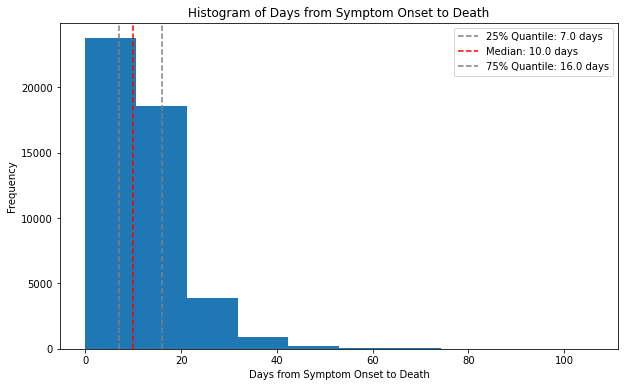

In [202]:
confirmados = data[data['RESULTADO']==1].copy()
confirmados.loc[:, 'OnsetToDeath'] = (confirmados['FECHA_DEF']-confirmados['FECHA_SINTOMAS']).dt.days

plt.figure(figsize=(10, 6))
plt.hist(confirmados['OnsetToDeath'])
plt.xlabel('Days from Symptom Onset to Death')
plt.ylabel('Frequency')
plt.title('Histogram of Days from Symptom Onset to Death')

# Important statistics
q25 = confirmados['OnsetToDeath'].quantile(0.25)
q75 = confirmados['OnsetToDeath'].quantile(0.75)
median_value = confirmados['OnsetToDeath'].median()

# Add vertical lines for median and mode
plt.axvline(q25, color='grey', linestyle='--', label=f'25% Quantile: {q25} days')
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value} days')
plt.axvline(q75, color='grey', linestyle='--', label=f'75% Quantile: {q75} days')


plt.legend()  # Show legend with median and mode labels

plt.show()

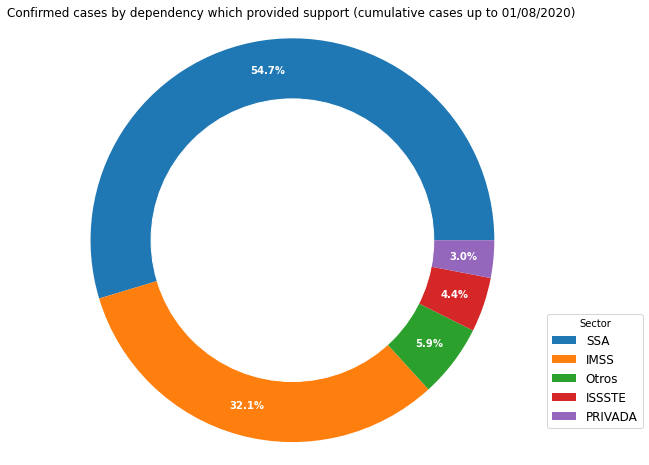

In [191]:
# Diccionario con el nombre correspondiente a cada sector
CodigoSector = {
    1: 'CRUZ ROJA',
    2: 'DIF',
    3: 'ESTATAL',
    4: 'IMSS',
    5: 'IMSS-BIENESTAR',
    6: 'ISSSTE',
    7: 'MUNICIPAL',
    8: 'PEMEX',
    9: 'PRIVADA',
    10: 'SEDENA',
    11: 'SEMAR',
    12: 'SSA',
    13: 'UNIVERSITARIO'
}

# Contamos casos registrados por cada sector
CasosSector = confirmados['SECTOR'].value_counts()

# Calculamos el % de casos por sector
CasosTotales = CasosSector.sum()
PorcentajesSector = CasosSector / CasosTotales * 100

# Agrupamos todos los sectores con menor participación del 3%
Otros = PorcentajesSector[PorcentajesSector < 3].index
confirmados.loc[confirmados['SECTOR'].isin(Otros), 'SECTOR'] = 'Otros'

# Recalculamos casos por sector y ordenamos de menor a mayor
CasosSector = confirmados['SECTOR'].value_counts()

# Graficamos
fig, ax = plt.subplots(figsize=(8, 8))
patches, texts, autotexts = ax.pie(CasosSector,autopct='%1.1f%%', pctdistance=0.85)
ax.axis('equal')
center_circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(center_circle)

for autotext in autotexts:
    autotext.set_color('white')  
    autotext.set_fontweight('bold') 

plt.legend(patches,[CodigoSector.get(key,'Otros') for key in CasosSector.index], loc="center right", bbox_to_anchor=(1.3,0.2), fontsize='large', title='Sector')
plt.title('Confirmed cases by dependency which provided support (cumulative cases up to 01/08/2020)')
plt.show()

In [259]:
# Group confirmed cases by date and state
confirmed_cases_grouped = confirmados.groupby(['FECHA_SINTOMAS', 'ENTIDAD_RES']).size().reset_index(name='confirmed_cases')
confirmed_deaths_grouped = confirmados.groupby(['FECHA_DEF', 'ENTIDAD_RES']).size().reset_index(name='confirmed_deaths')

confirmed_cases_grouped.rename(columns={'FECHA_SINTOMAS':'FECHA'}, inplace=True)
confirmed_deaths_grouped.rename(columns={'FECHA_DEF':'FECHA'}, inplace=True)

time_series = pd.merge(confirmed_cases_grouped, confirmed_deaths_grouped, how='outer', on=['FECHA', 'ENTIDAD_RES'])
time_series = merged_data.fillna(0)
time_series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4493 entries, 0 to 4492
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   FECHA             4493 non-null   datetime64[ns]
 1   ENTIDAD_RES       4493 non-null   int64         
 2   confirmed_cases   4493 non-null   float64       
 3   confirmed_deaths  4493 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 175.5 KB


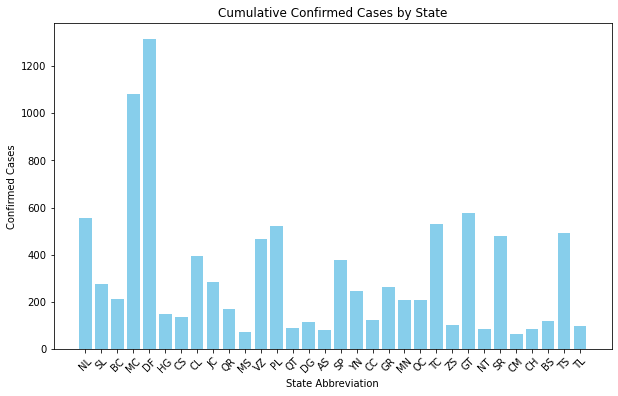

In [360]:
# Create the dictionary
state_codes = {
    '1': {'ENTIDAD_FEDERATIVA': 'AGUASCALIENTES', 'ABREVIATURA': 'AS'},
    '2': {'ENTIDAD_FEDERATIVA': 'BAJA CALIFORNIA', 'ABREVIATURA': 'BC'},
    '3': {'ENTIDAD_FEDERATIVA': 'BAJA CALIFORNIA SUR', 'ABREVIATURA': 'BS'},
    '4': {'ENTIDAD_FEDERATIVA': 'CAMPECHE', 'ABREVIATURA': 'CC'},
    '5': {'ENTIDAD_FEDERATIVA': 'COAHUILA DE ZARAGOZA', 'ABREVIATURA': 'CL'},
    '6': {'ENTIDAD_FEDERATIVA': 'COLIMA', 'ABREVIATURA': 'CM'},
    '7': {'ENTIDAD_FEDERATIVA': 'CHIAPAS', 'ABREVIATURA': 'CS'},
    '8': {'ENTIDAD_FEDERATIVA': 'CHIHUAHUA', 'ABREVIATURA': 'CH'},
    '9': {'ENTIDAD_FEDERATIVA': 'CIUDAD DE MÉXICO', 'ABREVIATURA': 'DF'},
    '10': {'ENTIDAD_FEDERATIVA': 'DURANGO', 'ABREVIATURA': 'DG'},
    '11': {'ENTIDAD_FEDERATIVA': 'GUANAJUATO', 'ABREVIATURA': 'GT'},
    '12': {'ENTIDAD_FEDERATIVA': 'GUERRERO', 'ABREVIATURA': 'GR'},
    '13': {'ENTIDAD_FEDERATIVA': 'HIDALGO', 'ABREVIATURA': 'HG'},
    '14': {'ENTIDAD_FEDERATIVA': 'JALISCO', 'ABREVIATURA': 'JC'},
    '15': {'ENTIDAD_FEDERATIVA': 'MÉXICO', 'ABREVIATURA': 'MC'},
    '16': {'ENTIDAD_FEDERATIVA': 'MICHOACÁN DE OCAMPO', 'ABREVIATURA': 'MN'},
    '17': {'ENTIDAD_FEDERATIVA': 'MORELOS', 'ABREVIATURA': 'MS'},
    '18': {'ENTIDAD_FEDERATIVA': 'NAYARIT', 'ABREVIATURA': 'NT'},
    '19': {'ENTIDAD_FEDERATIVA': 'NUEVO LEÓN', 'ABREVIATURA': 'NL'},
    '20': {'ENTIDAD_FEDERATIVA': 'OAXACA', 'ABREVIATURA': 'OC'},
    '21': {'ENTIDAD_FEDERATIVA': 'PUEBLA', 'ABREVIATURA': 'PL'},
    '22': {'ENTIDAD_FEDERATIVA': 'QUERÉTARO', 'ABREVIATURA': 'QT'},
    '23': {'ENTIDAD_FEDERATIVA': 'QUINTANA ROO', 'ABREVIATURA': 'QR'},
    '24': {'ENTIDAD_FEDERATIVA': 'SAN LUIS POTOSÍ', 'ABREVIATURA': 'SP'},
    '25': {'ENTIDAD_FEDERATIVA': 'SINALOA', 'ABREVIATURA': 'SL'},
    '26': {'ENTIDAD_FEDERATIVA': 'SONORA', 'ABREVIATURA': 'SR'},
    '27': {'ENTIDAD_FEDERATIVA': 'TABASCO', 'ABREVIATURA': 'TC'},
    '28': {'ENTIDAD_FEDERATIVA': 'TAMAULIPAS', 'ABREVIATURA': 'TS'},
    '29': {'ENTIDAD_FEDERATIVA': 'TLAXCALA', 'ABREVIATURA': 'TL'},
    '30': {'ENTIDAD_FEDERATIVA': 'VERACRUZ DE IGNACIO DE LA LLAVE', 'ABREVIATURA': 'VZ'},
    '31': {'ENTIDAD_FEDERATIVA': 'YUCATÁN', 'ABREVIATURA': 'YN'},
    '32': {'ENTIDAD_FEDERATIVA': 'ZACATECAS', 'ABREVIATURA': 'ZS'},
    }

# Convert state codes to strings
state_codes_str = {str(code): state for code, state in state_codes.items()}

# Map state codes to their corresponding abbreviations or full names
state_labels = [state_codes_str.get(str(code), {}).get('ABREVIATURA', 'Unknown') for code in time_series['ENTIDAD_RES']]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(state_labels, time_series['confirmed_cases'], color='skyblue')

# Set the labels and title
plt.xlabel('State Abbreviation')  # You can change this to 'State Name' if you prefer
plt.ylabel('Confirmed Cases')
plt.title('Cumulative Confirmed Cases by State')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [287]:
national = time_series.groupby('FECHA').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()
national[-7:]

,FECHA,confirmed_cases,confirmed_deaths
159,2020-07-26,1694.0,440.0
160,2020-07-27,1597.0,332.0
161,2020-07-28,797.0,356.0
162,2020-07-29,372.0,296.0
163,2020-07-30,62.0,294.0
164,2020-07-31,14.0,90.0
165,2020-08-01,0.0,3.0


In [325]:
data2 = pd.read_csv('/Users/ro/Downloads/200808COVID19MEXICO.csv', encoding='latin1')
#Convert object to date time format
data2['FECHA_INGRESO'] = pd.to_datetime(data2['FECHA_INGRESO'])
data2['FECHA_SINTOMAS'] = pd.to_datetime(data2['FECHA_SINTOMAS'])
data2['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data2['FECHA_DEF'] = pd.to_datetime(data2['FECHA_DEF'])

In [326]:
confirmados2 = data2[data2['RESULTADO']==1].copy()
confirmados2.loc[:, 'OnsetToDeath'] = (confirmados2['FECHA_DEF']-confirmados2['FECHA_SINTOMAS']).dt.days

In [327]:
# Group confirmed cases by date and state
confirmed_cases2_grouped = confirmados2.groupby(['FECHA_SINTOMAS', 'ENTIDAD_RES']).size().reset_index(name='confirmed_cases')
confirmed_deaths2_grouped = confirmados2.groupby(['FECHA_DEF', 'ENTIDAD_RES']).size().reset_index(name='confirmed_deaths')

confirmed_cases2_grouped.rename(columns={'FECHA_SINTOMAS':'FECHA'}, inplace=True)
confirmed_deaths2_grouped.rename(columns={'FECHA_DEF':'FECHA'}, inplace=True)

time_series2 = pd.merge(confirmed_cases2_grouped, confirmed_deaths2_grouped, how='outer', on=['FECHA', 'ENTIDAD_RES']).fillna(0)
time_series2.tail()

,FECHA,ENTIDAD_RES,confirmed_cases,confirmed_deaths
4712,2020-08-07,28,0.0,1.0
4713,2020-08-07,30,0.0,5.0
4714,2020-08-07,31,0.0,6.0
4715,2020-08-07,32,0.0,1.0
4716,2020-08-08,27,0.0,1.0


In [331]:
national2 = time_series2.groupby('FECHA').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()
national2[-14:-7]

,FECHA,confirmed_cases,confirmed_deaths
159,2020-07-26,4366.0,516.0
160,2020-07-27,5303.0,452.0
161,2020-07-28,4165.0,469.0
162,2020-07-29,3416.0,452.0
163,2020-07-30,2952.0,495.0
164,2020-07-31,2733.0,449.0
165,2020-08-01,3085.0,453.0


In [333]:
data3 = pd.read_csv('/Users/ro/Downloads/200815COVID19MEXICO.csv', encoding='latin1')
#Convert object to date time format
data3['FECHA_INGRESO'] = pd.to_datetime(data3['FECHA_INGRESO'])
data3['FECHA_SINTOMAS'] = pd.to_datetime(data3['FECHA_SINTOMAS'])
data3['FECHA_DEF'].replace('9999-99-99', pd.NaT, inplace=True)
data3['FECHA_DEF'] = pd.to_datetime(data3['FECHA_DEF'])
confirmados3 = data3[data3['RESULTADO']==1].copy()
confirmados3.loc[:, 'OnsetToDeath'] = (confirmados3['FECHA_DEF']-confirmados3['FECHA_SINTOMAS']).dt.days

In [334]:
# Group confirmed cases by date and state
confirmed_cases3_grouped = confirmados3.groupby(['FECHA_SINTOMAS', 'ENTIDAD_RES']).size().reset_index(name='confirmed_cases')
confirmed_deaths3_grouped = confirmados3.groupby(['FECHA_DEF', 'ENTIDAD_RES']).size().reset_index(name='confirmed_deaths')

confirmed_cases3_grouped.rename(columns={'FECHA_SINTOMAS':'FECHA'}, inplace=True)
confirmed_deaths3_grouped.rename(columns={'FECHA_DEF':'FECHA'}, inplace=True)

time_series3 = pd.merge(confirmed_cases3_grouped, confirmed_deaths3_grouped, how='outer', on=['FECHA', 'ENTIDAD_RES']).fillna(0)
time_series3.tail()

,FECHA,ENTIDAD_RES,confirmed_cases,confirmed_deaths
4935,2020-08-14,27,0.0,10.0
4936,2020-08-14,28,0.0,2.0
4937,2020-08-14,30,0.0,5.0
4938,2020-08-14,32,0.0,1.0
4939,2020-08-15,5,0.0,1.0


In [335]:
national3 = time_series3.groupby('FECHA').agg({
    'confirmed_cases': 'sum',
    'confirmed_deaths': 'sum'
}).reset_index()
national3[-21:-14]

,FECHA,confirmed_cases,confirmed_deaths
159,2020-07-26,5012.0,575.0
160,2020-07-27,6375.0,590.0
161,2020-07-28,5223.0,577.0
162,2020-07-29,4446.0,483.0
163,2020-07-30,4441.0,544.0
164,2020-07-31,4637.0,486.0
165,2020-08-01,6557.0,502.0


In [356]:
(national[['confirmed_cases','confirmed_deaths']][-7:] / national3[['confirmed_cases','confirmed_deaths']][-21:-14])*100

,confirmed_cases,confirmed_deaths
159,33.798883,76.521739
160,25.050980,56.271186
161,15.259429,61.698440
162,8.367072,61.283644
163,1.396082,54.044118
164,0.301919,18.518519
165,0.000000,0.597610


In [357]:
(national2[['confirmed_cases','confirmed_deaths']][-14:-7] / national3[['confirmed_cases','confirmed_deaths']][-21:-14])*100

,confirmed_cases,confirmed_deaths
159,87.110934,89.739130
160,83.184314,76.610169
161,79.743442,81.282496
162,76.833108,93.581781
163,66.471515,90.992647
164,58.938969,92.386831
165,47.048955,90.239044


In [361]:
data.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-01,0e23f9,2,3,15,1,15,15,99,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
1,2020-08-01,14c60f,2,3,15,2,15,15,106,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
2,2020-08-01,1b640f,2,4,9,2,9,9,11,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-01,0c8a89,2,4,15,2,15,15,109,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-08-01,159028,2,4,7,1,9,7,97,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
